In [1]:
from pythonosc import dispatcher, osc_server
from pythonosc.udp_client import SimpleUDPClient
import biofeatures, actuation_sequences
import matplotlib.pyplot as plt
%matplotlib inline

import threading
import numpy as np
import time

In [2]:
def riot_data_handler(unused_addr, args, *values): #R-IoT 
    global resp_data
    global osc_client
    
    B = args[0]

    resp_data.append(float(values[12]))
            
    if B.is_warmed_up:
        B.set_data(resp_data[-B.buffer_length:])

In [3]:
def warmup(B, resp_data):

    if not B.is_warmed_up:
        print("Breathing WARMUP")
        B.set_data(resp_data[-B.buffer_length:])
        B.is_warmed_up = True
        
    timer_act = threading.Timer(0.1, plot_data, [B, resp_data] ) # Thread based
    timer_act.start() # Thread based

In [10]:
def plot_data(B, resp_data):
    #print("plot")
    #plt.plot(resp_data)
    #plt.show()
    
    timer_act = threading.Timer(10, plot_data, [B, resp_data] ) # Thread based
    timer_act.start()

Serving on ('192.168.178.55', 31000)
Breathing WARMUP
plot


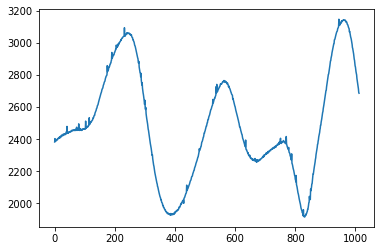

plot


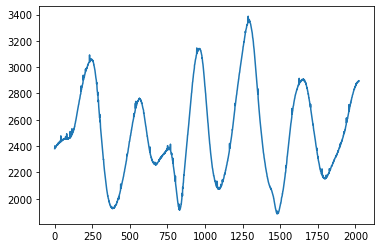

plot


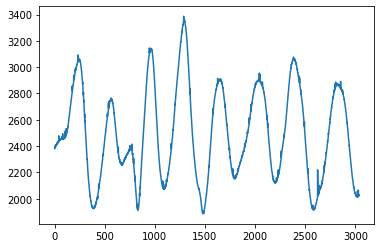

plot


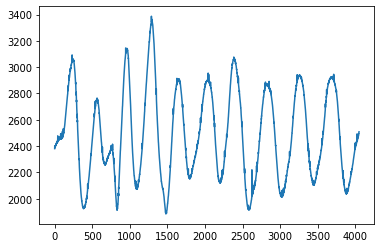

plot


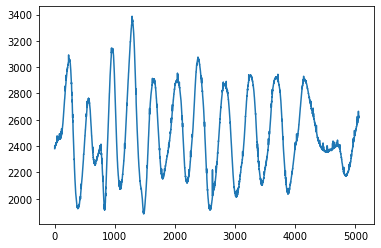

plot


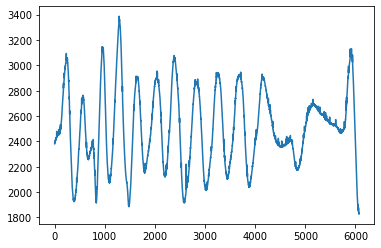

plot


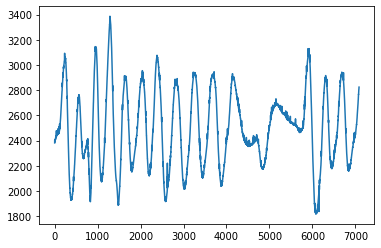

plot


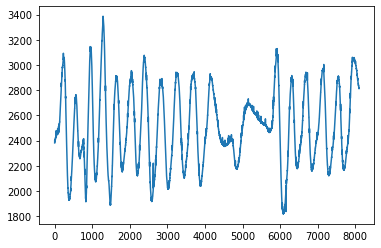

plot


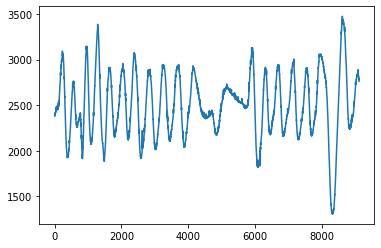

plot


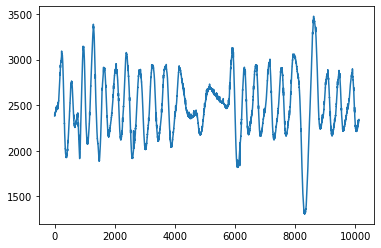

plot


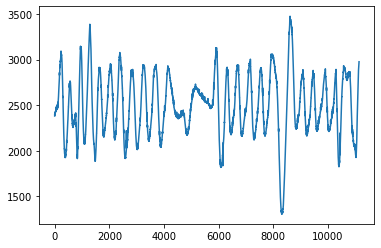

plot


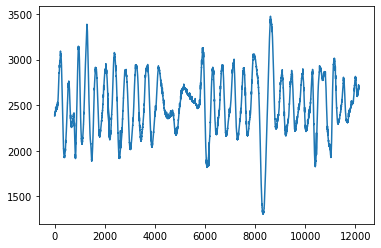

In [5]:
config_address = "/0/raw"
config_ip = "192.168.178.55"
config_port = 31000
srate = 200 

resp_data = []
B = biofeatures.breathing(data = np.ones(10), buffer_length=5000, srate=srate, breathing_factor = 1.6, hold_factor = 0.25)
B.routine = "none"

my_dispatcher = dispatcher.Dispatcher()
my_dispatcher.map(config_address, riot_data_handler, B)

server = osc_server.ThreadingOSCUDPServer((config_ip, config_port), my_dispatcher)
print("Serving on {}".format(server.server_address))

# Warmup
warmup_t = 10
timer_warmup = threading.Timer(warmup_t, warmup, [B,resp_data])
timer_warmup.start()

try: 
    server.serve_forever()
except KeyboardInterrupt:
    server.server_close()
except:
    raise

plot


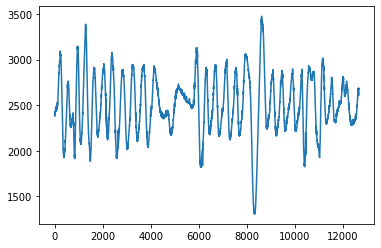

plot


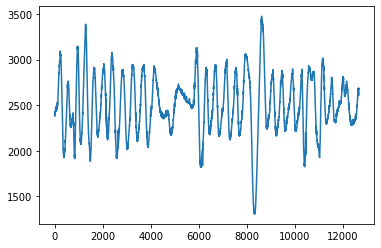

plot


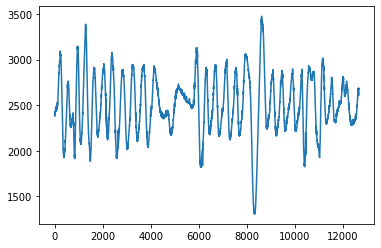

In [7]:
import biosppy.signals.resp as resp
import biosignalsnotebooks as bsnb

processed_data = resp.resp(signal=resp_data, sampling_rate=srate, show=False)

In [46]:
filtered_signal = processed_data[1]

signal_diff = np.diff(filtered_signal)
signal_signum = signal_diff > 0

resp_changes = np.append(np.where(signal_signum[:-1] != signal_signum[1:])[0], [len(signal_signum) - 1])

In [47]:
resp_intervals = np.append([0], resp_changes)
interval_lengths = np.diff(resp_intervals)
is_inhalation = [signal_signum[i] for i in resp_changes]

inhales = []
exhales = []

for i in range(len(interval_lengths)):
    if is_inhalation[i]:
        inhales.append(interval_lengths[i])
    else:
        exhales.append(interval_lengths[i])

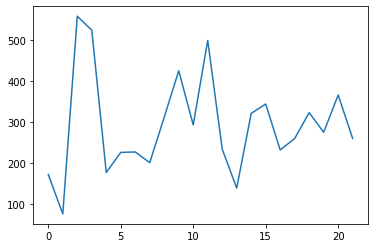

In [48]:
plt.plot(inhales)

In [49]:
len(inhales)

22

In [50]:
len(interval_lengths)

43

In [51]:
timestamps = [filtered_signal[i] for i in resp_changes]

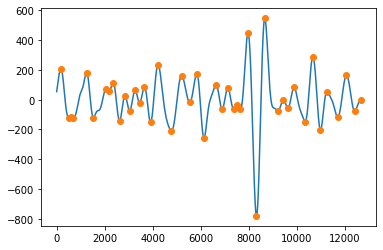

In [52]:
plt.plot(filtered_signal)
plt.plot(resp_changes,timestamps, 'o')

In [54]:
resp_changes

array([  173,   510,   587,   686,  1245,  1532,  2057,  2170,  2348,
        2616,  2843,  3036,  3264,  3451,  3653,  3907,  4220,  4774,
        5200,  5535,  5829,  6132,  6632,  6886,  7121,  7369,  7509,
        7642,  7964,  8316,  8661,  9205,  9438,  9621,  9882, 10339,
       10663, 10981, 11257, 11695, 12062, 12406, 12667])

In [66]:
filtered_changes = []

for i in range(len(resp_changes) - 1):
    if resp_changes[i+1] - resp_changes[i] > 150:
        filtered_changes.append(resp_changes[i])

In [67]:
np.array(filtered_changes)

array([  173,   686,  1245,  1532,  2170,  2348,  2616,  2843,  3036,
        3264,  3451,  3653,  3907,  4220,  4774,  5200,  5535,  5829,
        6132,  6632,  6886,  7121,  7642,  7964,  8316,  8661,  9205,
        9438,  9621,  9882, 10339, 10663, 10981, 11257, 11695, 12062,
       12406])

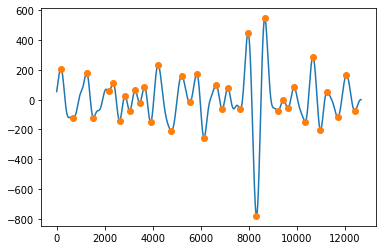

In [68]:
filtered_timestamps = [filtered_signal[i] for i in filtered_changes]

plt.plot(filtered_signal)
plt.plot(filtered_changes,filtered_timestamps, 'o')

In [69]:
resp_data2 = np.loadtxt("resp2504.csv", delimiter=',')

In [75]:
resp_data2 = resp_data2[:20000]

In [76]:
processed_data2 = resp.resp(signal=resp_data2, sampling_rate=srate, show=False)

filtered_signal2 = processed_data2[1]

signal_diff2 = np.diff(filtered_signal2)
signal_signum2 = signal_diff2 > 0

resp_changes2 = np.append(np.where(signal_signum2[:-1] != signal_signum2[1:])[0], [len(signal_signum2) - 1])

resp_intervals2 = np.append([0], resp_changes2)
interval_lengths2 = np.diff(resp_intervals2)
is_inhalation2 = [signal_signum2[i] for i in resp_changes2]
        
timestamps2 = [filtered_signal2[i] for i in resp_changes2]

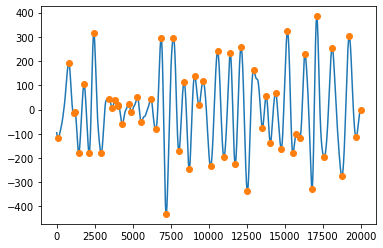

In [77]:
plt.plot(filtered_signal2)
plt.plot(resp_changes2,timestamps2, 'o')

In [78]:
len(timestamps2)

56

In [85]:
filtered_changes2 = []

for i in range(len(resp_changes2) - 1):
    if resp_changes2[i+1] - resp_changes2[i] > 250:
        filtered_changes2.append(resp_changes2[i])

filtered_timestamps2 = [filtered_signal2[i] for i in filtered_changes2]

In [86]:
len(filtered_timestamps2)

46

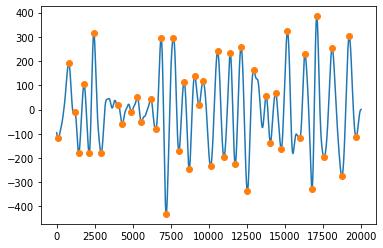

In [87]:
plt.plot(filtered_signal2)
plt.plot(filtered_changes2,filtered_timestamps2, 'o')